In [1]:
!python --version

Python 3.11.4


In [2]:
import os
os.getcwd()

'C:\\Users\\ual-laptop\\Downloads\\Lab7\\Lab7'

***
***

<div class="alert alert-block alert-warning">

***Check your kernels before starting!***
    
<p style="text-align:center;">
        <img src="Images/Best_Practice.png" width=500 class="center">
</p>

</div>

***
***

<div class="alert alert-danger">

## Before you continue!

Before we get started, let's first install the modules we'll be using. To do this, navigate to the Launcher tab and open a new Terminal. Run these commands:
    
```python
pip3 install --user 'rake-nltk' 'joblib' 'langdetect' 
pip3 install --user pyLDAvis==3.2.1
```
    
<p style="text-align:center;">
        <img src=Images/Launch_Terminal.png width=500 class="center">
</p>


Finally, re-open this Notebook.
    
***NOTE 1:*** You only need to install once!

***NOTE 2:*** This will take a few minutes... (be patient!)
    
</div>

***
***

## The Topic Model

Topic modeling is one of the important parts of natural language processing. 

The goal of topic modeling is to capture the topics from a set of documents and cluster the documents by their topics. Here, a topic is a cluster of terms that happen to co-occur together frequently across documents in a corpus. With many topic models, documents are seen not in terms of their syntax but instead as a mere "bag of words." In other words, documents are just containers for words, where the order they occur doesn't matter. What does matter is that these words co-occurred together in the same document. 

## The LDA Topic Model
Here we're going to use of the most popular topic models called a LDA (Latent Dirichlet allocation). Since the LDA model doesn’t have to deal with large matrix processing, it has the fastest process speed.

<p style="text-align:center;">
        <img src="Images/12_LDA.png" width=500 class="center">
</p>

LDA (short for Latent Dirichlet Allocation) is an unsupervised machine-learning model that takes documents as input and finds topics as output. The model also says in what percentage each document talks about each topic.

The mechanics of the LDA model are complex, so let's look at it from a high-level. Assumes you have a corpus made up of documents, and each of these documents are made up of terms. (And like the good computational social scientist, you already stemmed and cleaned-up these terms in each document across the corpus.) The LDA model assumes that the terms of every document is actually a particular mixture of some number of topics, where a topic is characterized by a distribution of terms. 

Both the topics in a document and words in a topic follow something called a Dirichlet distribution. This distribution is somewhat related to a coin-flip. When you flip a coin, you have one of two options: heads or tails. Now, replace "heads" and "tails" with the number of topics that exist in your corpus. It's highly unlikely that you have only two topics, so we use the Dirichlet distribution to handle a coin with multiple sides. (Obviously, a coin only has two sides, but I want to make the point that essentially the Dirichlet distribution is a coin-toss with multiple sides.) 

Thus, a topic is represented as a weighted list of words. An example of a topic is shown below:

<p style="text-align:center;">
        <img src="Images/12_LDA_2.png" width=800 class="center">
</p>

The LDA topic model will "train" or "learn" these data (think back to machine learning!), and determine the probability distribution of every term across all of the topics. (We can also determine from this the probability distribution of documents across these topics.)


So, how many topics are there? There is no correct answer of how many topics there are, because you decide how many exist **before** you run the LDA. This is where both the art and science of LDA comes head-to-head. How we choose the number of objects totally dependents on the purpose of the project. However, there are ways to measure if we picked the number of topics that are a good "fit" for our specific data. 

Thus, there are 3 main parameters of the model:
- the number of topics, given by the parameter `K`
- `Alpha`, which represents document-topic density. With a higher alpha, documents are made up of more topics, and with lower alpha, documents contain fewer topics. Higher alpha results in a more specific topic distribution per document. 
- `Beta`, which represents topic-word density. With a higher beta, topics are made up of most of the words in the corpus, and with a low beta they consist of few words. `Beta` results in a more specific word distribution per topic.

In reality, the last two parameters are not exactly designed like this in the algorithm, but I prefer to stick to these simplified versions which are easier to understand.

***

## LDA and Gibbs Sampling
(Source - https://medium.com/mlearning-ai/topic-modelling-with-lda-on-the-tweets-mentioning-elon-musk-687076a2c86b)

LDA learns these distribution using Gibbs Sampling. The steps which it follows are:

Iterate through each document, and randomly assign each word in the document to one of the m topics.

If we look at it closely, we will find that this random assignment gives us both topic distributions for all the n documents and word distributions for all the m topics. Initially, these distributions won’t be very accurate.

To improve the distribution for each document d, iterate through each word w in d. For each topic t, compute the two probabilities:

1. p(topic t | document d) = number of words in document d that are currently assigned to topic t/total no. of words in d

2. p(word w | topic t) = the proportion of assignments to topic t over all documents that come from this word w.

Having calculated the above two probabilities, reassign w a new topic, where we choose topic t with probability p(topic t | document d) * p(word w | topic t). Note that for each word, we will get a vector of probabilities that will explain how likely this word belongs to each of the topics.

After repeating the previous step a large number of times, you’ll eventually reach a roughly steady state where your assignments are pretty good. So use these assignments to estimate the topic mixtures of each document (by counting the proportion of words assigned to each topic within that document) and the words associated to each topic (by counting the proportion of words assigned to each topic overall).

***

## Introducing `Gensim()`

We're going to be using `gensim` to run our Topic Models, so let's import them here. 

First, let's import the modules we'll need. 


In [22]:
!pip install --user 'rake-nltk' 'joblib' 'langdetect' 
!pip install --user pyLDAvis==3.2.1

ERROR: Invalid requirement: "'rake-nltk'"


     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.7 MB 3.5 MB/s eta 0:00:01
     ------------ --------------------------- 0.5/1.7 MB 8.3 MB/s eta 0:00:01
     ------------------------- -------------- 1.1/1.7 MB 9.6 MB/s eta 0:00:01
     ------------------------------------- -- 1.6/1.7 MB 11.0 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.7 MB 10.4 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136181 sha256=e6fe5b53a00e50be40b2cdc92bd625bbb2bf5e91fe149c2da90345eb061bdd66
  Stored in directory: c:\users\ual-laptop\appdata\local\pip\cache\wheels\ae\69\44\1708c54aad5a7e712e19420a0b51ab9a7cbb9fb980b527ab41
Successfully built pyLDAvis


In [25]:
!pip install langdetect

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---- --------------------------------- 112.6/981.5 kB 6.8 MB/s eta 0:00:01
     ------------------- ------------------ 491.5/981.5 kB 7.8 MB/s eta 0:00:01
     ------------------------------------  972.8/981.5 kB 10.4 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993253 sha256=33bd888b54ce27929954f02cba05202c55772231e7e964482f4da5c91d2c1e38
  Stored in directory: c:\users\ual-laptop\appdata\local\pip\cache\wheels\0a\f2\b2\e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [47]:
!pip install rake-nltk

Defaulting to user installation because normal site-packages is not writeable


In [189]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import gensim
from gensim.matutils import Sparse2Corpus
from gensim import corpora, models, similarities
from gensim.corpora import Dictionary, MmCorpus

In [4]:
from nltk.corpus import stopwords
import nltk 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re

In [5]:
import pandas as pd
from dfply import *
from plotnine import *
import numpy as np
import time
import requests
import string
from collections import Counter

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In this example, let's use a dataset of academic articles published in 2021 taken from the field of sociology. (These data are from the OpenAlex project.) 

In [191]:
Sociology_Text_df = pd.read_csv('Data/Sociology_Papers_2021.csv')

Take a quick peek at these data.

In [192]:
Sociology_Text_df.head()

,fieldofstudy,id,title,paperabstract,year,countries
0,Sociology,f75fa7229c3c41399f9f90441cda53d04402d1a3,There Can Be More Than One: A Black Man’s Jour...,The underrepresentation of Black Americans as ...,2021,United States
1,Sociology,bb6f31cb734cce7f45443fea7a1f2677c617e0de,El itinerario reflexivo: de la desazón discipl...,Las diferentes implicaciones del hombre de cie...,2021,Spain
2,Sociology,4389016dea443ead00955d9be19a2410f69b89ac,Boundary spanning and identity work in the cli...,"Background Research nurses, midwives and allie...",2021,United Kingdom
3,Sociology,4389016dea443ead00955d9be19a2410f69b89ac,Boundary spanning and identity work in the cli...,"Background Research nurses, midwives and allie...",2021,United Kingdom
4,Sociology,097142e05e7ec620b5ffb76fdea214f89aced2d1,Fan centricity of German soccer teams: explori...,ABSTRACT The goal of the present study is to c...,2021,Germany


Here, we're only going to use the columns `id` (for paper id), the paper's abstract and the countries of the authors on the paper.

There may be a few duplicates, so we'll also drop those papers. 

In [193]:
Text_df = (Sociology_Text_df >>
select("id","paperabstract","countries")).drop_duplicates(subset=['id'], keep='first')

Let's again take a quick peek at these data. 

In [194]:
Text_df.head()

,id,paperabstract,countries
0,f75fa7229c3c41399f9f90441cda53d04402d1a3,The underrepresentation of Black Americans as ...,United States
1,bb6f31cb734cce7f45443fea7a1f2677c617e0de,Las diferentes implicaciones del hombre de cie...,Spain
2,4389016dea443ead00955d9be19a2410f69b89ac,"Background Research nurses, midwives and allie...",United Kingdom
4,097142e05e7ec620b5ffb76fdea214f89aced2d1,ABSTRACT The goal of the present study is to c...,Germany
6,a835b7988a81c825b0d88649159b2100f659050b,This chapter focuses on the dynamics surroundi...,South Africa


Let's change the name of the column `paperabstract` to `articles` and let's remove papers with missing abstract texts. 

In [195]:
Text_df = (Text_df >>
 select(~X.id) >>
 rename(articles = "paperabstract")>>
mask(X.articles!=''))

Let's see how many rows we have currently. 

In [196]:
Text_df.shape

(9411, 2)

Now, let's remove any NAs from our dataset, as many articles many not have any text associated to it. (E.g., the web scraping process is far from perfect, and sometimes we can't extract data.) 

In [197]:
Text_df = Text_df.dropna().reset_index(drop=True)

Let's see how many rows we dropped.(We shouldn't drop any with these data, but it's good 

In [198]:
Text_df.shape

(9411, 2)

***
***


<div class="alert alert-block alert-success">

# Checkpoint 1 
    
Now you try!

For this checkpoint, just read in similar data to the BBC news articles. These data will come from the New York Times. Label the `DataFrame` as `NYTimes_df`. These New York Times article deal with issues related to Silicon Valley and the tech industry in San Francisco. Since these data are really big, we're just going to subset these data and take the first 1000 rows, hence be sure to use `.head(1000)` when reading in these data. 

```python
NYTimes_df = pd.read_csv('Data/New_York_Times_SF_All.csv').head(1000)
```
    
Explore the data just as you did for the BBC data.  Here, you'll focus on the `article` column. 

Don't forget to remove NAs! 

***One small caveat (and this may be useful to you for future work you do):*** Here, we'll remove any document that contains less than 50 characters. Documents with just short sentences, for instance, are not all that informative. So also run the following code below.  

This code keeps rows (articles) that have a length of greater than 50 characters. 
    
```python
NYTimes_df = (NYTimes_df >>
 mask(~X.article.isnull()) >>
 mask(X.article.map(len)>=50))
```


In [199]:
NYTimes_df = pd.read_csv('Data/New_York_Times_SF_All.csv').head(1000)
NYTimes_df.head()

,datetime,headline,id,abstract,url,article
0,1/1/15 0:00,"A Reversal for InDinero, a Once-Struggling Acc...",54a4149838f0d80267d2a507,"In 2012, InDinero had spent nearly all of the ...",http://www.nytimes.com/2015/01/01/business/sma...,Jessica Mah was 20 when she helped found InDin...
1,1/1/15 0:00,Jim Harbaugh Inspires a Run on Khakis at Michigan,54a461a438f0d83a07dc3eff,The football coach takes his baggy khakis alon...,http://www.nytimes.com/2015/01/01/fashion/jim-...,"ANN ARBOR, Mich. In the final days of the yea..."
2,1/1/15 0:00,Recycling Electronic Waste Responsibly: Excuse...,54a48b3938f0d83a07dc487c,With more retail chains offering drop-off bins...,http://www.nytimes.com/2015/01/01/technology/p...,MAYBE you replaced old electronics over the ho...
3,1/1/15 0:00,What Lies Beneath Takes a Gulp of Air,54a48cd038f0d83a07dc48dd,Flora Grubb introduces minimal steel holders f...,http://www.nytimes.com/2015/01/01/garden/what-...,"People love air plants, but it can be a little..."
4,1/1/15 0:00,"Standouts in Tech: Drones, Virtual Reality, In...",54a4943438f0d83a07dc4a97,Farhad Manjoo picks four products from 2014 th...,http://www.nytimes.com/2015/01/01/technology/p...,LOTS of cool new technology products come out ...


In [200]:
NYTimes_df.shape

(1000, 6)

In [201]:
NYTimes_df_cleaned = NYTimes_df.dropna().reset_index(drop=True)

In [202]:
NYTimes_df_cleaned.shape

(292, 6)

***
***

## Preparing the Data

First, we'll need to clean the data. Note here that many of the languages of these articles are NOT in English. For our example, we're only going to focus on English language articles, but you can just as easily run LDAs on different languages.

Since we don't have data on whether the article was written in English or not, we need to install a package called `langdetect` that will provide a fairly reasonably guess as to what language each article is written in. 

Let's import `langdetect`. Specifically, we'll use a function called `detect` from this module. 

In [203]:
from langdetect import detect

Now, use the `apply()` method to the `articles` column in our `DataFrame` and apply a function called `detect` from `langdetect`. It will return a two-letter code for the language it detects in every article.

**NOTE:** This will take some time, so be patient. 

**NOTE:** `langdetect` fails when string length is very small.

In [204]:
Text_df = (Text_df >>
 mask(X.articles.apply(lambda x: len(x)>10)) >>  
 mutate(lang = X.articles.apply(detect)))

Let's take a peek at our new column `lang`. 

In [28]:
Text_df

,articles,countries,lang
0,The underrepresentation of Black Americans as ...,United States,en
1,Las diferentes implicaciones del hombre de cie...,Spain,es
2,"Background Research nurses, midwives and allie...",United Kingdom,en
3,ABSTRACT The goal of the present study is to c...,Germany,en
4,This chapter focuses on the dynamics surroundi...,South Africa,en
...,...,...,...
9406,"The COVID-19 pandemic forced districts, school...",United States,en
9407,Review of: Picture Pedagogy: Visual Culture Co...,Israel,en
9408,ABSTRACT This paper reports on an Australian n...,Australia,en
9409,Movements seeking to infuse markets with moral...,United Kingdom,en


Great! It seems to mostly work! 

Now let's use the `pandas` method `.value_counts()` to see how many papers' abstracts are written in each language. 

As you can see, `en` (English) is far in the majority. (Given that English is the lingua franca of the sciences and since many databases have English-language biases, this shouldn't come as a surprise.) Since English data are plentiful, we'll use them. 

In [30]:
Text_df.lang.value_counts()

en    9077
fr      69
et      68
pt      61
es      59
id      10
ru       9
de       8
af       7
hr       7
hu       7
it       3
fa       3
bg       1
ca       1
lv       1
cy       1
tr       1
sv       1
ar       1
Name: lang, dtype: int64

Since we only want English article, let's subset on the new column we just made that contains the language for each article. Let's subset just on English (or `en`) articles, denoted by `en` in the `lang` column. 

In [31]:
Text_df = (Text_df >>
 mask(X.lang=='en'))

Now let's run `value_counts` again to check our work. 

In [32]:
Text_df.lang.value_counts()

en    9077
Name: lang, dtype: int64

***
***

<div class="alert alert-block alert-success">

# Checkpoint 2
    
Now you try!

Using the New York Times `DataFrame`, count the number of articles that are in English, and keep only those English  articles. 

Note, that you'll focus only on the column called `article`. This may take some time! 

Also recall how we removed any article with less than 50 characters. This is because `detect` will only work if there's enough text to use to determine the language. 

In [34]:
NYTimes_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  292 non-null    object
 1   headline  292 non-null    object
 2   id        292 non-null    object
 3   abstract  292 non-null    object
 4   url       292 non-null    object
 5   article   292 non-null    object
dtypes: object(6)
memory usage: 13.8+ KB


In [35]:
from langdetect import detect

In [37]:
NYTimes_df_cleaned = (NYTimes_df_cleaned >>
 mask(X.article.apply(lambda x: len(x)>10)) >>  
 mutate(lang = X.article.apply(detect)))

In [38]:
NYTimes_df_cleaned.head()

,datetime,headline,id,abstract,url,article,lang
0,1/1/15 0:00,"A Reversal for InDinero, a Once-Struggling Acc...",54a4149838f0d80267d2a507,"In 2012, InDinero had spent nearly all of the ...",http://www.nytimes.com/2015/01/01/business/sma...,Jessica Mah was 20 when she helped found InDin...,en
1,1/1/15 0:00,Jim Harbaugh Inspires a Run on Khakis at Michigan,54a461a438f0d83a07dc3eff,The football coach takes his baggy khakis alon...,http://www.nytimes.com/2015/01/01/fashion/jim-...,"ANN ARBOR, Mich. In the final days of the yea...",en
2,1/1/15 0:00,Recycling Electronic Waste Responsibly: Excuse...,54a48b3938f0d83a07dc487c,With more retail chains offering drop-off bins...,http://www.nytimes.com/2015/01/01/technology/p...,MAYBE you replaced old electronics over the ho...,en
3,1/1/15 0:00,What Lies Beneath Takes a Gulp of Air,54a48cd038f0d83a07dc48dd,Flora Grubb introduces minimal steel holders f...,http://www.nytimes.com/2015/01/01/garden/what-...,"People love air plants, but it can be a little...",en
4,1/1/15 0:00,"Standouts in Tech: Drones, Virtual Reality, In...",54a4943438f0d83a07dc4a97,Farhad Manjoo picks four products from 2014 th...,http://www.nytimes.com/2015/01/01/technology/p...,LOTS of cool new technology products come out ...,en


In [39]:
NYTimes_df_cleaned.lang.value_counts()

en    292
Name: lang, dtype: int64

***
***

## Cleaning the Corpus

Now, we're going to have to do the dirty work of cleaning each paper and preparing it for our LDA. Thankfully, we've actually done this process before, so it should be rather easy. 

If you are a bit shaky on this process, review the previous labs on cleaning data for a good refresher. 

We're going to remove punctuation and lemmatize these articles, as well as remove any English stop words from it. In this process, we'll convert each article into a list of tokens to be processed by the LDA. 

Below, let's define the punctuation, lemmatizer, and stop words, as well as the function that will do the heavy lifting that we explored last time. 

In [40]:
def token_process(doc):
    
    ## stop words and updates
    ## Note, you should add more terms to this list to see what may or may not be useful.
    ## Also note, that I also remove punctuation here by adding the string module
    stop_en = stopwords.words('english') + list(string.punctuation) + [u'abstract',u'...',u',',u'.',u'?',u'!',u':',u';', u')', u'“', u"'", u"_",
                                                                       u'(',u'[',u']',u'{',u'}',u'%',u'@',u'-',u'`',
                                           u'new',u'tr',u'th',u'to',u'on',u'of',u'mr', u"n't",
                                           u'monday','tuesday',u'wednesday',u'thursday',u'friday',u'saturday',u'sunday','want','befor','becaus'
                                           u'said',u'ms',u'york',u'say',u'could',u'q',u'got',u'found',u'began','|',"''","'s","``","--",
                                           'mr','year','would','one','way','l','ms.','$','mr.','dr.','get','before','like','know','day','because',
                                           '"','see','look','dont','im','&','b','also','de','la','el','en','un','two','al','su','es','lo','se']
        
    #stemming
    stemmer = SnowballStemmer("english")
    
    #lemmatizer
    lemmatizer = WordNetLemmatizer() 
    
    #remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))

    #tokenize
    tokens = [w.strip() for sent in sent_tokenize(doc) for w in word_tokenize(sent)] if doc else None
    
    #remove numbers
    num_pat = re.compile(r'^(-|\+)?(\d*).?(\d+)')
    tokens = filter(lambda x: not num_pat.match(x), tokens)
    
    #remove dates
    date_pat =  re.compile(r'^(\d{1,2})(/|-)(\d{1,2})(/|-)(\d{2,4})$')
    tokens = filter(lambda x: not date_pat.match(x), tokens)
    
    #use stemmer
    stemmed_tokens = map(lambda x: stemmer.stem(x), tokens)
    
    #filter out empty tokens and stopwords
    stemmed_tokens = filter(lambda x: x and x.strip() not in stop_en, stemmed_tokens)

    #use lemmatizer
    lemmatized_and_stemmed_tokens = map(lambda x: lemmatizer.lemmatize(x), stemmed_tokens)

    #again filter out empty tokens and stopwords
    lemmatized_and_stemmed_tokens = filter(lambda x: x and x.strip() not in stop_en, lemmatized_and_stemmed_tokens)

    #remove any lingering white space tokens
    lemmatized_and_stemmed_tokens = filter(lambda x: x and x.strip() not in [u' '],lemmatized_and_stemmed_tokens)

    #remove any ngram whose length is less than 3
    lemmatized_and_stemmed_tokens = filter(lambda x: len(x)>2,lemmatized_and_stemmed_tokens)

    x = ' '.join(lemmatized_and_stemmed_tokens)
    
    #create ngrams from n=2 to 3
    bigrams = [bigram[0]+"_"+bigram[1] for bigram in list(nltk.ngrams(x.split(' '),2))]
    trigrams = [trigram[0]+"_"+trigram[1]+"_"+trigram[2] for trigram in list(nltk.ngrams(x.split(' '),3))]
    
    x = x.split(' ')
    x.extend(bigrams)
    x.extend(trigrams)
    
    return x

Now, let's apply `token_process`, a modified (and combined) function from last time that we apply to the abstract text column. 

This function will produce tokens that have been put in lower case, lemmatized, and will remove stop words and punctuation. Here, I add more stop words and punctuations that may be unique to this corpus. When you actually do this with your own data, you will need to go back and update this list accordingly.  

We'll apply `token_process()` to each row in `articles` by using the `.apply(lambda x:)` `pandas` method. The end result is an paper that was once one long string now turned into a list of tokens that have been cleaned up and ready for processing. 

N.B., this may take a minute or two.

In [44]:
Text_df = (Text_df >>
 mutate(abstracts_filtered = X.articles.apply(lambda doc: token_process(doc))))

Now, let's take a look at this new column. 

In [45]:
Text_df.abstracts_filtered

0       [underrepresent, black, american, graduat, stu...
2       [background, research, nurs, midwiv, alli, hea...
3       [goal, present, studi, conceptu, fan, centric,...
4       [chapter, focus, dynam, surround, inclusionari...
5       [articl, put, privileg, theori, convers, child...
                              ...                        
9406    [covid19, pandem, forc, district, school, teac...
9407    [review, pictur, pedagogi, visual, cultur, con...
9408    [paper, report, australian, nation, investig, ...
9409    [movement, seek, infus, market, moral, valu, o...
9410    [іntroduct, histor, legal, scienc, well, scien...
Name: abstracts_filtered, Length: 9077, dtype: object

Each row is now a list of terms extracted from each paper's abstract texts. These data are often refered to as a "bag of words." These sorts of models don't care as much **where** the term is in the document (or abstract in this case), just that these terms are in a document "bag" containing these terms ("words"). 

***
***

## Using `RAKE` to Filter Terms, an Alternative Approach

Alternatively, we can extract terms using RAKE, which is short for Rapid Automatic Keyword Extraction algorithm. It is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

Keyphrases are a set of words (or groups of words) that summarize the important points of the paragraph. It isn’t a conclusive summary of the text, it’s just a list of relevant concepts that were discussed in the article.

## How Does Keyphrase Extraction Work?

***Lemmatize Text:*** It doesn’t make sense to include each and every word in the vocabulary of the text passage when words like writing’, ‘written’, ‘wrote’ as they mean the same: ‘write’. So, we lemmatize text, i.e., bring each word to its root form before anything else.

***Select Potential Phrases:*** Text passages contain many words, but not all of them are relevant. Most of them might be frequently used words like ‘a’, ‘that’, ‘then’ and so on. Such words, called stopwords, must be filtered else they will contaminate the output. Consecutive words bearing contextual similarity must be grouped together.

***Score Each Phrase:*** Once you have a list of possible phrases, you need to rank them to figure out which one is the most important.

Let's give it a try!

In [48]:
from rake_nltk import Rake

Uses stopwords for english from NLTK, and all puntuation characters by default

In [49]:
r = Rake()

We can also pass in parameters. For instance, we want unigrams (e.g., min_length=1) through trigrams (e.g., max_length=3), we want to use our stopword list, and remove punctuations. 

Also, `Rake` will return the same term multiple times, so let's also set `include_repeated_phrases` to `False` so that phrases only show up once in the output. 

In [50]:
r = Rake(min_length=1,max_length=3,stopwords=stopwords.words('english'),punctuations=string.punctuation,include_repeated_phrases=False)

Now we can use `extract_keywords_from_text` to extract `Rake` identified keywords from the text. 

Let's give it a try with the text below. 

In [51]:
example_rake_text="Feature extraction is not that complex. There are many algorithms available that can help you with feature extraction. Rapid Automatic Key Word Extraction is one of those."

In [52]:
r.extract_keywords_from_text(example_rake_text)

Now, we can get keyword phrases ranked highest to lowest.

In [53]:
r.get_ranked_phrases()

['many algorithms available', 'feature extraction', 'one', 'help', 'complex']

We can also pass in `Rake` into a function that we can apply to a corpus. 

In [54]:
def Extract_Phrases_Rake(input_text):
    try:
        r = Rake(min_length=1,max_length=3,stopwords=stopwords.words('english'),punctuations=string.punctuation,include_repeated_phrases=False)
        r.extract_keywords_from_text(input_text)
        return r.get_ranked_phrases()
    except:
        return []

Let's give it a try!

Let's apply `Rake` to our `Text_df` article data and save it to a new column called `abstracts_filtered_rake`. 

**N.B.**, this may take a moment.

In [55]:
Text_df = (Text_df >>
 mutate(abstracts_filtered_rake = X.articles.apply(lambda doc: Extract_Phrases_Rake(doc))))

Let's take a look.

How do the two columns, `abstracts_filtered` and `abstracts_filtered_rake` differ?

In [56]:
Text_df.head()

,articles,countries,lang,abstracts_filtered,abstracts_filtered_rake
0,The underrepresentation of Black Americans as ...,United States,en,"[underrepresent, black, american, graduat, stu...","[criminal justice programs, essay sheds light,..."
2,"Background Research nurses, midwives and allie...",United Kingdom,en,"[background, research, nurs, midwiv, alli, hea...","[tensions involved extend, negotiate complex i..."
3,ABSTRACT The goal of the present study is to c...,Germany,en,"[goal, present, studi, conceptu, fan, centric,...","[two broad themes, inductive coding procedures..."
4,This chapter focuses on the dynamics surroundi...,South Africa,en,"[chapter, focus, dynam, surround, inclusionari...","[importance despite aspects, constraining feat..."
5,ABSTRACT This article puts privilege theory in...,United States,en,"[articl, put, privileg, theori, convers, child...","[suggests future directions, largely invisible..."


***
***

<div class="alert alert-block alert-success">

# Checkpoint 3
    
Now you try!

Filter the articles in just the same way as we did here for the sociology papers. Use both the first pre-defined function and the `Rake` function. 

In [58]:
NYTimes_df_cleaned = (NYTimes_df_cleaned >>
 mutate(abstracts_filtered = X.article.apply(lambda doc: token_process(doc))))

In [59]:
NYTimes_df_cleaned.abstracts_filtered

0      [jessica, mah, help, indinero, back, believ, h...
1      [ann, arbor, mich, final, rumor, intensifi, ji...
2      [mayb, replac, old, electron, holiday, sweep, ...
3      [peopl, love, air, plant, littl, tricki, figur...
4      [lot, cool, technolog, product, come, everi, u...
                             ...                        
287    [startup, uber, lyft, make, accept, carpool, t...
288    [updat, jeb, bush, technolog, guru, rough, fir...
289    [critic, element, puerto, rico, plan, avert, f...
290    [hong, kong, last, decad, foreign, technolog, ...
291    [never, scientif, career, quit, maryclair, kin...
Name: abstracts_filtered, Length: 292, dtype: object

In [60]:
from rake_nltk import Rake

In [61]:
r = Rake()

In [62]:
def Extract_Phrases_Rake(input_text):
    try:
        r = Rake(min_length=1,max_length=3,stopwords=stopwords.words('english'),punctuations=string.punctuation,include_repeated_phrases=False)
        r.extract_keywords_from_text(input_text)
        return r.get_ranked_phrases()
    except:
        return []

In [63]:
NYTimes_df_cleaned = (NYTimes_df_cleaned >>
 mutate(abstracts_filtered_rake = X.article.apply(lambda doc: Extract_Phrases_Rake(doc))))

In [64]:
NYTimes_df_cleaned.head()

,datetime,headline,id,abstract,url,article,lang,abstracts_filtered,abstracts_filtered_rake
0,1/1/15 0:00,"A Reversal for InDinero, a Once-Struggling Acc...",54a4149838f0d80267d2a507,"In 2012, InDinero had spent nearly all of the ...",http://www.nytimes.com/2015/01/01/business/sma...,Jessica Mah was 20 when she helped found InDin...,en,"[jessica, mah, help, indinero, back, believ, h...","[whether theyre working, specialty job boards,..."
1,1/1/15 0:00,Jim Harbaugh Inspires a Run on Khakis at Michigan,54a461a438f0d83a07dc3eff,The football coach takes his baggy khakis alon...,http://www.nytimes.com/2015/01/01/fashion/jim-...,"ANN ARBOR, Mich. In the final days of the yea...",en,"[ann, arbor, mich, final, rumor, intensifi, ji...","[van boven clothing, san francisco sports, san..."
2,1/1/15 0:00,Recycling Electronic Waste Responsibly: Excuse...,54a48b3938f0d83a07dc487c,With more retail chains offering drop-off bins...,http://www.nytimes.com/2015/01/01/technology/p...,MAYBE you replaced old electronics over the ho...,en,"[mayb, replac, old, electron, holiday, sweep, ...","[theyve tried hard, theres always ebay, includ..."
3,1/1/15 0:00,What Lies Beneath Takes a Gulp of Air,54a48cd038f0d83a07dc48dd,Flora Grubb introduces minimal steel holders f...,http://www.nytimes.com/2015/01/01/garden/what-...,"People love air plants, but it can be a little...",en,"[peopl, love, air, plant, littl, tricki, figur...","[spindly steel base, flora grubb gardens, said..."
4,1/1/15 0:00,"Standouts in Tech: Drones, Virtual Reality, In...",54a4943438f0d83a07dc4a97,Farhad Manjoo picks four products from 2014 th...,http://www.nytimes.com/2015/01/01/technology/p...,LOTS of cool new technology products come out ...,en,"[lot, cool, technolog, product, come, everi, u...","[white kitchen stove, two pizzas sitting, stil..."


***
***

## Preparing to Run the LDA

We'll need to turn this column into a format. 

First, convert this column to a `list` using the `.tolist()` method. 

Here, let's go ahead and use the `Rake` filtered corpus. 

In [65]:
initial_corpus = Text_df["abstracts_filtered_rake"].tolist()

Since the corpus is rather long, and since this is meant for demonstrative purposes, let's just use the first 4,000 documents.

In [66]:
initial_corpus = initial_corpus[0:4000]

Let's take a quick peek at a random document. Feel free to change the index number to take a look at any other document in the corpus.

***Warning!: The FULL `initial_corpus` list is very LONG!***

In [67]:
initial_corpus[10]

['rural south india',
 'participatory action research',
 'knowledge generation phase',
 'elucidate forces shaping',
 'critical participatory approaches',
 'critical disability perspectives',
 'participatory analysis conducted',
 'restricted occupational possibilities',
 'occupational injustice related',
 'critical occupational science',
 'utilized participatory filmmaking',
 'diverse human occupations',
 'critical theoretical analysis',
 'ways contested responsibility',
 'occupational injustices generated',
 'theoretical analysis',
 'occupational injustices',
 'occupational marginalization',
 'occupational degradation',
 'sanctioned occupations',
 'filmmaking process',
 'data generated',
 'study context',
 'situating understandings',
 'service providers',
 'presenting findings',
 'paper illustrates',
 'paper contributes',
 'nuanced understanding',
 'fore fronted',
 'findings address',
 'enhancing understanding',
 'complex layers',
 'community members',
 'child co',
 'ways',
 'co',
 'we

***

## Creating the Dictionary

From the module `corpora`, we'll use the function `Dictionary` to convert our list of tokens into a `corpora-specific Dictionary` object. We do this because we want to do some "trimming" of the corpus that is more easily done (e.g., doesn't take up too much memory) in this format. 

(Indeed, the biggest challenge with text analysis is memory constraints, so converting objects into other form may be annoying, but is a necessity to avoid a memory leakage issue, halting your code.)

In [68]:
dictionary_LDA = corpora.Dictionary(initial_corpus)

Let's see how many terms are in our corpus. 

In [69]:
print(len(dictionary_LDA))

90552


***

## Most Frequent N-Grams

Let's take a look at what are the most popular (frequent) terms in our corpus. Thankfully, using `corpora` to transform our initial corpus, we can use a feature called `.cfs` (short for collection frequencies) from `dictionary_LDA` to get frequency counts. In other words, how many times does this n-gram appear in our corpus? 

Below, we use a `Dictionary` to cycle through each term in `dictionary_LDA` and return it's frequency. 

In [70]:
term_frequency = {dictionary_LDA[id_]:value_ for id_, value_ in dictionary_LDA.cfs.items()}

From here, we can use the module `heapq` and the function `nlargest` to get the n-largest terms.

Let's look at the 30 most frequency terms.

In [71]:
from heapq import nlargest

In [72]:
nlargest(30,term_frequency, key=term_frequency.get)

['well',
 'study',
 'research',
 'abstract',
 'however',
 'based',
 'use',
 'development',
 'used',
 'students',
 'role',
 'work',
 'article',
 'analysis',
 'context',
 'need',
 'understanding',
 'education',
 'covid',
 'argue',
 'time',
 'practice',
 'results',
 'paper',
 '1',
 'field',
 'concept',
 'explore',
 'one',
 'order']

We can also look at specific term frequencies. Let's look at the frequency for the term `covid`.

In [73]:
term_frequency['covid']

285

Alternatively, we can also get a document count. In other words, how many documents does this n-gram appear?

Instead of using the `.cfs` feature, we'll use `.dfs` instead (document frequencies). We'll repeat the same procedure as above.

In [74]:
term_document_frequency = {dictionary_LDA[id_]:value_ for id_, value_ in dictionary_LDA.dfs.items()}

In [75]:
nlargest(30,term_document_frequency, key=term_document_frequency.get)

['well',
 'study',
 'research',
 'abstract',
 'however',
 'based',
 'use',
 'development',
 'used',
 'students',
 'role',
 'work',
 'article',
 'analysis',
 'context',
 'need',
 'understanding',
 'education',
 'covid',
 'argue',
 'time',
 'practice',
 'results',
 'paper',
 '1',
 'field',
 'concept',
 'explore',
 'one',
 'order']

In [76]:
term_document_frequency['covid']

285

You'll notice that many of the top terms are overlaping!

This is a good trick to know! You'll likely need to go through your corpus several times to trim many of these unwanted terms. Using document frequencies is a good way to find such terms! This is because terms that exist across multiple documents are often not helpful!

For your future work, be sure to go through and use document frequencies to filter out these non-useful terms.

Let's use these top terms are remove them from our corpus. 

First, let's combine these lists. 

In [77]:
terms_to_remove = list(set(nlargest(30,term_document_frequency, key=term_document_frequency.get)) & set(nlargest(30,term_frequency, key=term_frequency.get)))

In [78]:
terms_to_remove

['practice',
 'understanding',
 'use',
 'education',
 'covid',
 'article',
 '1',
 'need',
 'field',
 'analysis',
 'research',
 'time',
 'work',
 'used',
 'well',
 'development',
 'explore',
 'order',
 'abstract',
 'one',
 'argue',
 'based',
 'paper',
 'role',
 'results',
 'concept',
 'study',
 'students',
 'however',
 'context']

We do want to keep some terms, like `covid` and `education`, so let's remove them.

In [79]:
terms_to_remove = [term for term in terms_to_remove if term not in ['covid','education']]

We can use the method called `filter_tokens` to remove these terms. Since this method requires the `id` of the term (and not the term itself), we cause the other method `token2id` to pass in the string to return its id to then pass it into `filter_tokens`.

Let's use a `for loop` to achieve this. 

In [80]:
for term in terms_to_remove:
    dictionary_LDA.filter_tokens(bad_ids=[dictionary_LDA.token2id[term]])

Finally, let's test this and see if it worked. The term `use` shouldn't be in the corpus. 

In [81]:
"use" in dictionary_LDA

False

***

## Filtering Out Words by Counts

Many of the words are going to be superfluous: one off words that don't have any meaning that we didn't catch with the stop words. This is rather common, as capturing every token that doesn't have any meaning is near impossible. 

Instead, we can create a cutoff value that removes terms if they appear less than `n` number of times in the corpus. Here, we can use the `.filter_extremes()` method applied to our `corpora Dictionary`. Use two parameters to filter the dictionary based on frequency in the corpus:

- `no_above`: A number between 0 and 1  (a float) refering to a percentage that represents the portion of a word in total corpus size.

- `no_below`: An integer (NOT a number between 0 and 1!) reflecting the number of times when a word shows in corpus. It is a threshold.

I set `no_below` to 10, so any term that occurs in less than ten documents will be removed. 

**Note:** This is a bit confusing, but we don't need to save this filtering onto itself. It automatically does it in place. 

In [82]:
dictionary_LDA.filter_extremes(no_below=10,
                               no_above=0.10)

Let's see how many terms are now left. How does this compare to the previous number?

In [83]:
print(len(dictionary_LDA))

2496


***

## Creating the Corpus

Now, let's prepare the corpus before we submit it to the LDA model. 

Recall that the LDA model sees documents as a "bag of words." In other words, documents are a big burlap sack of words, and the fact that these words were used in this document means something. Namely, that documents are themselves just collections of topics. We just don't know how many topics and which terms are in these topics. This is the job of the LDA to uncover!

For the package `gensim`, we can't merely pass in the list of tokens in its current form. Instead we need to pass it in a very particular format, namely as a list of tuples. In other words, each element in the tuple is a combination of the token: as a unique identifier given as some number, followed by the number of times it appears in this specific document. 

Let's actually see what this means. First, let's convert our list of documents currently stored as a list of tokens (again, this is found in `initial_corpus`) into a list of tuples of token IDs and the number of times the token appears in the document. 

We'll use the method `.doc2bow()` &mdash; in other words, document to "bag of words" &mdash; to take each "document" in the list `initial_corpus` and convert the string tokens into these tuples. 

So, we use list comprehension to loop through each article in `initial_corpus` and convert every list to a list of tuples.

In [84]:
LDA_corpus = [dictionary_LDA.doc2bow(doc_) for doc_ in initial_corpus]

So, let's again see the first document in the corpus and what it looks like now. 

***Warning!: The full `LDA_corpus` is going to be LONG!***

In [85]:
LDA_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]

Here, we see a list of tuples `[(,)]`, where the first entry are the unique IDs assigned to each token, followed by the number of times the token appears in this document. 

Since we used `Rake`, the second value in every tuple will always be 1, since that's how we set up or filtering. 


***

## Comparing the Dictionary to the Corpus

Let's see how this corresponds to what we have in our `LDA_corpus`. 

We can use `dictionary_LDA` to convert from a token ID to the actual token. So let's try that out. 

Let's look at what corresponds to that first ID entry. 

In [86]:
dictionary_LDA[0]

'academy'

Check for yourself! To do this, use `Control-F` or `Command-F` [depending on your OS] in your browser and search for this term in the first document in `intial_corpus`. 

It should appear once in the list below for the first document.

In [87]:
initial_corpus[0]

['criminal justice programs',
 'essay sheds light',
 'academy creates challenges',
 'essay discusses',
 'various experiences',
 'potentially contribute',
 'highest levels',
 'graduate students',
 'black representation',
 'black men',
 'black americans',
 'academy',
 'well',
 'underrepresentation',
 'sharing',
 'recognized',
 'lack',
 'faculty',
 'exist',
 'dynamics',
 'dearth',
 'criminology']

We can even do this with the original article. Print out the original raw article and search again for the term to find the number of times it appears.

In [88]:
print(Text_df.articles.iloc[0])

The underrepresentation of Black Americans as graduate students and faculty in Criminology and Criminal Justice programs is well-recognized. This essay discusses some of the dynamics of the academy that potentially contribute to the lack of Black representation at the highest levels of the academy. Through the sharing of various experiences, this essay sheds light on how the dearth of Black men in the academy creates challenges for the few Black men that do exist in the academy.


Or we can simply have python go through the first document and count the number of occurances of this term. 

In [89]:
initial_corpus[0].count(dictionary_LDA[0]) 

1

We can also check how many times `'dynamics'` appears in the whole entire corpus. To do that we'll create a `for-loop` that iterates through the `initial_corpus`, counts every occurance of `'dynamics'` in each document, saves that to a list, and finally sums up that list. 

In [90]:
output = list() # creating a blank list 
for item in initial_corpus:
    tally = (item.count(dictionary_LDA[0])) # counting each occurance of "alli" 
    output.append(int(tally)) # appending those frequencies to a list 

Let's add the lists together. 

In [91]:
print(sum(output)) # adding the list together 

11


***

## Counting within the Dictionary 

On another note, if you want to just view a couple of terms in the `dictionary_LDA`, you can iterate through and print out some values.  

Let's have some fun and print out every 100th word. 

In [92]:
for i in range(0,len(dictionary_LDA),100): 
    print(dictionary_LDA[i])

academy
data
different
interaction
discusses
areas
curriculum
deal
majority
study aims
immigration
advances
helpful
aims
connection
heart
digital platforms
inclusive education
either
far
peculiarities
produce
china ’
socially
future studies


But now what if we want both the actual terms and their frequency counts? We can do that too!  
We can make a `for-loop` that goes through `dictionary_LDA` and combine those names with the tuples in `corpus`, replacing the ID entry with the actual word. This is just a way to make the `corpus` tuples understandable to the human eye.   

We're only going through the first document - to go through all we can simply do just corpus without any bracket. 

In [93]:
[[(dictionary_LDA[id], freq) for id, freq in cp] for cp in LDA_corpus[:1]] 

[[('academy', 1),
  ('dearth', 1),
  ('dynamics', 1),
  ('exist', 1),
  ('faculty', 1),
  ('lack', 1),
  ('recognized', 1),
  ('sharing', 1)]]

***
***

<div class="alert alert-block alert-success">

# Checkpoint 4 

Now you try!

Prepare the `Dictionary`, `corpus`, and the `initial_corpus` for the New York Times data. 

Label the `Dictionary` as `NYTimes_dictionary_LDA`, the `corpus` as `NYTimes_corpus`, and the `initial_corpus` as `NYTimes_initial_corpus`. 

In [120]:
NYTimes_initial_corpus = NYTimes_df_cleaned["abstracts_filtered_rake"].tolist()

In [121]:
NYTimes_initial_corpus = NYTimes_initial_corpus[0:4000]

In [122]:
NYTimes_initial_corpus[10]

['uncommonly skilled politician',
 'stage management orchestrated',
 'shoreham nuclear plant',
 'sexual orientation .)',
 'satisfy everyones hopes',
 'sagging political image',
 'record 65 percent',
 'reading passages aloud',
 'proposing tax increases',
 'owned gulfstream g',
 'mother seated onstage',
 'mary anne krupsak',
 'married matilda n',
 'governors unrealized promise',
 'five million cast',
 '8 billion deficit',
 '244 batting average',
 '1964 worlds fair',
 '000 signing bonus',
 'youve done everything',
 'whose tortuous deliberations',
 'westchester county executive',
 'roman catholic politicians',
 'relatively barren field',
 'old sing sing',
 'morning telephone calls',
 'former housing secretary',
 'five percentage points',
 'fight drug abuse',
 'enjoyed socratic arguments',
 'businessman lewis e',
 'admired figure outside',
 'two chartered airplanes',
 'income public housing',
 'compelling public presence',
 'please dont let',
 'play center field',
 'often unrestrained perso

## Creating the Dictionary

In [123]:
NYTimes_dictionary_LDA = corpora.Dictionary(NYTimes_initial_corpus)

In [124]:
print(len(NYTimes_dictionary_LDA))

45008


## Creating the Corpus

In [125]:
NYTimes_corpus = [NYTimes_dictionary_LDA.doc2bow(doc_) for doc_ in NYTimes_initial_corpus]

In [126]:
NYTimes_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [127]:
NYTimes_initial_corpus[0]

['whether theyre working',
 'specialty job boards',
 'romantically involved .]',
 'price point higher',
 'personal growth thing',
 'neither necessarily lasts',
 'marriage counselors listed',
 'individual contributors report',
 'get carried away',
 'favorite interview questions',
 'companies like salesforce',
 'changing anytime soon',
 'bad hires added',
 'limited free offerings',
 'four wont send',
 'chief technology officer',
 'software handle especially',
 'cheap software solution',
 'business owners track',
 'stop accounting solution',
 'trained sales teams',
 'p ./ director',
 'founder marriage counseling',
 'every single candidate',
 'core company values',
 '500 customers range',
 'get new business',
 'provides accounting software',
 'really didnt know',
 'didnt actually solve',
 'manage 20 people',
 'helped found indinero',
 'customer gives us',
 'turned things around',
 '000 per month',
 'could help small',
 '100 leadership books',
 'big business problem',
 'didnt file',
 'weve 

In [128]:
print(NYTimes_df_cleaned.article.iloc[0])

Jessica Mah was 20 when she helped found InDinero in 2009. Back then she believed she could help small-business owners track their finances with her start-ups software. But as it turned out, Ms. Mah could barely keep InDinero afloat, let alone help others run their businesses. In its first version, InDinero, in San Francisco, charged its few customers $20 a month for its software. Competition, which included companies like QuickBooks, was fierce, and a series of bad hires added to InDineros woes. The company was going nowhere, Ms. Mah said. But by the time she realized this, in 2012, InDinero had spent nearly all of the $1.2 million it had raised from investors. A few years ago, I really didnt know that much, said Ms. Mah, the chief executive. In fact, she said, I almost crashed the company. And yet, today, InDinero, which provides accounting software and services to small businesses, has 75 employees and just under $3 million in annual sales. It expects to double that in 2015, and has

***
***

## Running the LDA

Now that we've done heavy lifting (i.e., formatting our data), we can now run the LDA. This is the easy part! 

Recall that we need to pick out the proper hyperparameters. For our purposes, we'll focus on two here: `K` topics and `alpha`. 

`K` is more of a tuning parameter, in that it's a bit of a guess as to what the right value of `K` is. For the sake of argument, let's just use a `K` of 10, or that we expect there to be 20 distinct topics in our sociology paper corpus. 

For `alpha`, let's set it as 0.01, a standard value often used in NLP. For `alpha`, we need to pass it in as a list, whose length is the same as the number of topics. This is achieved by `[0.01]*number_of_topics`. 

We also pass in our "dictionary" that we created earlier: `dictionary_LDA` as our token ID to terms dictionary. 

In [113]:
num_topics = 10 # Number of topics that we set initially as K. 

In [114]:
np.random.seed(123456) # This initializes (re-seeds) the random generator.

Okay, let's FINALLY run it! 

Pass in `corpus`, the number of topics, the `dictionary_LDA` and `alpha`. LDAs can take some time. To speed this up, we're going to use a special version of the LDA model called a `LdaMulticore` model. This may look familiar to you from an earlier lab!

It's an LDA model that uses multicore processors (if available) to speed up the model! (You can use the regular `models.LDA()` as well to similar effect.)

We'll first need to see how many cores your machine has available. We can do this using the module `psutil`.

In [106]:
import psutil

Let's use the function called `cpu_count()` to count the number of CPUs (cores) you have available on your machine.

In [107]:
psutil.cpu_count()

8

We'll want to use ***n-1*** cores available on your machine. 

**N.B.**: We DON'T want to use all of the cores, because then your computer won't have any dedicated cores to run your OS and its basic functions! 

In [108]:
N_Cores = psutil.cpu_count()-1

Now, we're ready to run the model.

**N.B.:** This will throw a lot of errors at you and will likely ***take some time to run.*** Don't worry and go grab a cup of coffee!

In [109]:
lda_model = models.LdaMulticore(corpus = LDA_corpus,
                            num_topics=num_topics,
                            workers=N_Cores, # NOTE: the number of cores!!
                            id2word=dictionary_LDA,
                            alpha=[0.01]*num_topics,
                            random_state=0)

Hopefully if your computer didn't blow up, the model should have completed successfully! Let's take a look at the top 20 words most associated to each of the `K` topics. 

We'll run a `for` loop and use the method `.show_topics()` to print out the top 20 terms for each of the `K` topics. 

In [110]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.002*"san francisco" + 0.002*"one" + 0.002*"said" + 0.002*"mr" + 0.001*"time" + 0.001*"well" + 0.001*"year" + 0.001*"get" + 0.001*"also" + 0.001*"according" + 0.001*"1" + 0.001*"much" + 0.001*"people" + 0.001*"part" + 0.001*"two" + 0.001*"see" + 0.001*"end" + 0.001*"would" + 0.001*"way" + 0.001*"ms"

1: 0.001*"san francisco" + 0.001*"one" + 0.001*"year" + 0.001*"mr" + 0.001*"said" + 0.001*"part" + 0.001*"way" + 0.001*"people" + 0.001*"trying" + 0.001*"time" + 0.001*"still" + 0.001*"get" + 0.001*"much" + 0.001*"would" + 0.001*"go" + 0.001*"well" + 0.001*"lot" + 0.001*"see" + 0.001*"new york" + 0.001*"many"

2: 0.002*"said" + 0.001*"mr" + 0.001*"well" + 0.001*"san francisco" + 0.001*"time" + 0.001*"year" + 0.001*"one" + 0.001*"see" + 0.001*"get" + 0.001*"would" + 0.001*"also" + 0.001*"like" + 0.001*"people" + 0.001*"want" + 0.001*"take" + 0.001*"made" + 0.001*"even" + 0.001*"ms" + 0.001*"work" + 0.001*"still"

3: 0.002*"san francisco" + 0.001*"said" + 0.001*"one" + 0.001*"mr" + 0.001

***

## What Are the Topics?

We might be able to see a pattern with some of these topics. 

If this were our actual research project, we'd need to go through the corpus one more time and more move punctuation and stop words. Indeed, the first time you run an LDA, you'll need to likely re-run the LDA and move terms that happened to slip through that you need to remove. 

Note that the LDA model just sorts terms into topics based on mathmatical procedures, but it's up to you as a researcher then to put on your thinking caps and go through the topics to check if they make sense and try to label/interpret the topics. 

Recall our "bag of words" assumption. Let's again look at the first article in the corpus and see what topics make up this article. 

In [111]:
print(Text_df.articles.iloc[0])

The underrepresentation of Black Americans as graduate students and faculty in Criminology and Criminal Justice programs is well-recognized. This essay discusses some of the dynamics of the academy that potentially contribute to the lack of Black representation at the highest levels of the academy. Through the sharing of various experiences, this essay sheds light on how the dearth of Black men in the academy creates challenges for the few Black men that do exist in the academy.


***

Clearly, this article has to do with the dirth of Black graduate student and faulty representation in criminology and criminal justice programs. We can use the LDA model we just ran and see what topics make up this article. 

Let's use `lda_model` and pass in the text from `LDA_corpus`, namely the first document, to see. 

In [112]:
lda_model[LDA_corpus[0]]

[(2, 0.8589901), (3, 0.14076833)]

This produces a list of tuples. The first value is the ID related to the topic and the second value is how much this topic dominates the document. The first document is 98% comprised of the sixth topic (remember, the count starts at zero, not one). 

Look at what the top terms for each topic is (as produced by the `for-loop`). Does this make sense to you?

***
***

<div class="alert alert-block alert-success">

# Checkpoint 5

Now you try!

Run the LDA model for your NY Times data. Choose some `K` number of topics. I would suggest pick a value of `K` that is less than 20 but greater than 5. (Let's keep `alpha` as 0.01.) Save your LDA model as `NYTimes_lda_model`. 

Print out the top twenty words for each topic. 

Which topics make up first article in your corpus?

In [115]:
num_topics = 10 # Number of topics that we set initially as K. 

In [116]:
np.random.seed(123456) # This initializes (re-seeds) the random generator.

In [117]:
psutil.cpu_count()

8

In [118]:
N_Cores = psutil.cpu_count()-1

In [141]:
NYTimes_lda_model = models.LdaMulticore(corpus = NYTimes_corpus,
                            num_topics=num_topics,
                            workers=N_Cores, # NOTE: the number of cores!!
                            id2word=NYTimes_dictionary_LDA,
                            alpha=[0.01]*num_topics,
                            random_state=0)

In [142]:
for i,topic in NYTimes_lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.002*"san francisco" + 0.002*"one" + 0.002*"said" + 0.002*"mr" + 0.001*"time" + 0.001*"well" + 0.001*"year" + 0.001*"get" + 0.001*"also" + 0.001*"according" + 0.001*"1" + 0.001*"much" + 0.001*"people" + 0.001*"part" + 0.001*"two" + 0.001*"see" + 0.001*"end" + 0.001*"would" + 0.001*"way" + 0.001*"ms"

1: 0.001*"san francisco" + 0.001*"one" + 0.001*"year" + 0.001*"mr" + 0.001*"said" + 0.001*"part" + 0.001*"way" + 0.001*"people" + 0.001*"trying" + 0.001*"time" + 0.001*"still" + 0.001*"get" + 0.001*"much" + 0.001*"would" + 0.001*"go" + 0.001*"well" + 0.001*"lot" + 0.001*"see" + 0.001*"new york" + 0.001*"many"

2: 0.002*"said" + 0.001*"mr" + 0.001*"well" + 0.001*"san francisco" + 0.001*"time" + 0.001*"year" + 0.001*"one" + 0.001*"see" + 0.001*"get" + 0.001*"would" + 0.001*"also" + 0.001*"like" + 0.001*"people" + 0.001*"want" + 0.001*"take" + 0.001*"made" + 0.001*"even" + 0.001*"ms" + 0.001*"work" + 0.001*"still"

3: 0.002*"san francisco" + 0.001*"said" + 0.001*"one" + 0.001*"mr" + 0.001

In [143]:
print(NYTimes_df_cleaned.article.iloc[0])

Jessica Mah was 20 when she helped found InDinero in 2009. Back then she believed she could help small-business owners track their finances with her start-ups software. But as it turned out, Ms. Mah could barely keep InDinero afloat, let alone help others run their businesses. In its first version, InDinero, in San Francisco, charged its few customers $20 a month for its software. Competition, which included companies like QuickBooks, was fierce, and a series of bad hires added to InDineros woes. The company was going nowhere, Ms. Mah said. But by the time she realized this, in 2012, InDinero had spent nearly all of the $1.2 million it had raised from investors. A few years ago, I really didnt know that much, said Ms. Mah, the chief executive. In fact, she said, I almost crashed the company. And yet, today, InDinero, which provides accounting software and services to small businesses, has 75 employees and just under $3 million in annual sales. It expects to double that in 2015, and has

***
***

## Predicting Topics on Unseen Documents

Let's try and predict the topics on a document unseen by the LDA (i.e., not trained by the LDA). Here is a sample abstract, which comes from this paper (https://doi.org/10.1177/00031224221119803). Let's see what topics are found in this unseen article by the LDA. 

In [133]:
document = '''
A core sociological claim is that race is a social construction; an important illustration of this is how racial classifications are influenced by people’s socioeconomic status. 
In both Latin America and the United States, someone with higher SES is more likely to be classified as White than others of similar appearance, a pattern epitomized by the expression money whitens. 
However, recent studies of the effect of SES on racial classifications show inconsistent results, sometimes depending on the measures used. 
We develop a broad theorization of societies as having multiple racialized hierarchies with different socioeconomic escalators potentially bringing people to higher-status locations in each one. 
Yet racialized hierarchies differ across societies, and some non-White classifications may reflect a process of upward movement while others may not. 
We assess this process in Mexico using the 2019 Project on Ethnic-Racial Discrimination in Mexico, a nationally-representative survey including highly accurate digital skin-color ratings, perceived skin-color assessments, and ethnoracial classifications by respondents and interviewers. 
We find that having higher education increases respondents’ self-classification as Mestizo. Yet those with greater wealth are whitened by interviewers. 
Simultaneously, respondents and interviewers lighten respondents with greater wealth. We argue that SES can differentially affect mobility in different racialized hierarchies, showing how race is constructed partly by other social constructs like class.
'''

Turn the document into a list of tokens. 

Here, we're going to again use RAKE to extract keywords, but you could aalso use the `word_tokenize` function, as well. 

In [134]:
#tokens = word_tokenize(document) 

In [135]:
tokens = Extract_Phrases_Rake(document)

In [136]:
tokens

['multiple racialized hierarchies',
 'expression money whitens',
 'differentially affect mobility',
 'different racialized hierarchies',
 'core sociological claim',
 'interviewers lighten respondents',
 'upward movement',
 'united states',
 'status locations',
 'sometimes depending',
 'socioeconomic status',
 'social construction',
 'similar appearance',
 'recent studies',
 'racial discrimination',
 'racial classifications',
 'perceived skin',
 'people ’',
 'pattern epitomized',
 'measures used',
 'latin america',
 'important illustration',
 'greater wealth',
 'ethnoracial classifications',
 'constructed partly',
 'color ratings',
 'color assessments',
 'broad theorization',
 '2019 project',
 'others may',
 'mexico using',
 'higher ses',
 'respondents',
 'interviewers',
 'ses',
 'others',
 'mexico',
 'higher',
 'yet',
 'whitened',
 'white',
 'someone',
 'societies',
 'simultaneously',
 'showing',
 'race',
 'process',
 'one',
 'non',
 'nationally',
 'mestizo',
 'likely',
 'influenced',


Let's pass in this new article and see what topics comprise it according to the LDA. 

We can use the `lda_model` and `dictionary_LDA` object and its `.doc2bow()` method, to take each token from `document` to calculate the topic distribution. 

Here, I've saved the output as a `DataFrame` to make it easier to see. 

In [137]:
pd.DataFrame([(el[0], round(el[1],2)) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], 
             columns=['Topic #', 'Weight'])

,Topic #,Weight
0,3,0.38
1,7,0.61


We see here the distribution of topics across the documents. Note, that the weight sums to 100%

Given the article, look back at the top terms for each of these topics from the earlier `for-loop` for `lda_model.show_topics` and see if you agree with this distribution. 

***
***

## Visualizing Topics

`pyLDAvis` is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

The visualization is intended to be used within a Jupyter notebook but can also be saved to a stand-alone HTML file for easy sharing.


Now, let's import these modules, and set `%matplotlib inline` to visualize the LDA results.

In [138]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
from joblib import parallel_backend

Now, let's run the pyLDAvis! Thankfully, we already have all the inputs that we need from our previous work. 

One somewhat confusing thing is that we need add in an extra line of code `with parallel_backend('threading'):` in order for it to work. This is because `pyLDAvis` is very CPU and memory intensive, and parallelizing it in the backend will ensure the visualization works and doesn't crash. 

**NOTE:** This may take a few minutes to run! 

In [139]:
with parallel_backend('threading'):
    vis = pyLDAvis.gensim.prepare(topic_model=lda_model, 
                                  corpus=LDA_corpus, 
                                  dictionary=dictionary_LDA, 
                                  sort_topics=False)

C:\Users\ual-laptop\AppData\Roaming\Python\Python311\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


Here's a short vignette that explains more specifically what's happening: 

https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf

In broad strokes, it visualizes the topics that were found in the LDA model. 

First in the box next to "Select Topic" put in a topic number (anywhere from 0 to 19, inclusive) to visualize the specific topic. 

For each topic, the visualization produces two plots. The plot to the left is the "intertopic distance" map, or how dissimilar or similar topics are to one another. (This procedure actually uses a PCA!) The size of each topic's "bubble" is proportional to the proportions of the topics across all of the tokens in the corpus. 

The bar chart on th right is the most relevant topics to each topic. The red bars estimate number of times a given term was generated by a given topic. The blue bars capture the overall frequency of each term in the corpus. Finally, the relevance of words is computed with a parameter lambda, where the optimal Lambda value is taken at around ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf). 

In [140]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

Looking at the pyLDAvis chart, do we think this is a good model? 
Look at the size and overlap of the bubbles.
1. Notice how some bubbles make up around or even less than 2% of the topic distribution. How relavent do you think these topics are across all of the tokens in the corpus?
2. Notice the overlap of the bubbles. How unique and mutually exclusive do you think these topics are?

Again, you will likely need to re-run these models multiple times with better data and slightly-tuned parameters. At the end of the day, you need to decide what makes sense, not the machine!

***
***

<div class="alert alert-block alert-success">

# Checkpoint 6
    
Now you try!

Use `pyLDAvis` for the LDA model you ran on the New York Times data. Explore a few topics. Remember, everyone will pick a different value of `K`, so the results will vary. 

In [146]:
with parallel_backend('threading'):
    NY_vis = pyLDAvis.gensim.prepare(topic_model=NYTimes_lda_model, 
                                  corpus=NYTimes_corpus, 
                                  dictionary=NYTimes_dictionary_LDA, 
                                  sort_topics=False)

C:\Users\ual-laptop\AppData\Roaming\Python\Python311\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


In [147]:
pyLDAvis.enable_notebook()
pyLDAvis.display(NY_vis)

***
***

## Validating Our LDA Model: What Value of `K` Is Best?

There are many other approaches to evaluate topic models, but most approaches are rather poor. One way is just human inspection, to see if these topics make sense. Hence, topic visualization is a good way to assess topic models. 

However, can we find some sort of quantifiable metric? One measure that is commonly used is perplexity, a measure of entropy.

Perplexity is one of the intrinsic evaluation metrics, and is widely used for language model evaluation. It captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set. 

Focusing on the log-likelihood part, you can think of the perplexity metric as measuring how probable some new unseen data is given the model that was learned earlier. That is to say, how well does the model represent or reproduce the statistics of the held-out data? However, recent studies have shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated. In other words, optimizing for perplexity may not yield human interpretable topics. 

***

## Topic Coherence
The concept of topic coherence combines a number of measures into a framework to evaluate the coherence between topics inferred by a model. 

Topic Coherence measures the score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

Coherence is a set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”

There are several ways to measure coherence. We'll use a method called `c_v`. It's a measure based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity. 

Two other coherence measures are:
1. `C_uci` measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
2. `C_umass` is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure

First, let's import `CoherenceModel`. 

In [162]:
from gensim.models import CoherenceModel

Now, let's compute the coherence score. We've run everything that we need already, so it's a matter of putting it into our function. The default `coherence` parameter is `c_v`.

In [163]:
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=initial_corpus,
                                     dictionary=dictionary_LDA,
                                     coherence='c_v')

Now, let's run the `.get_coherence()` method from our coherence object. 

In [164]:
coherence_lda = coherence_model_lda.get_coherence()

In [165]:
coherence_lda

0.5184718333827097

We get a rather low coherence value. We want the lowest number of `K` topics while also yielding the highest coherence values. 

We would want to re-run the model with different values of `K` so that our model yields the highest coherence score possible.

***

## A Better Approach with `UMass`

Coherence metric is popular because it’s the default metric in the `Gensim` topic coherence pipeline module, but it has some issues. Even the author of this metric doesn’t recommend using it.

Instead of using the CV score, we recommend using the UMass coherence score. It calculates how often two words, w_{i} and w_{j} appear together in the corpus and it’s defined as

\begin{equation*} C_{UMass}(w_{i}, w_{j}) = \log \frac{D(w_{i}, w_{j}) + 1}{D(w_{i})}, \end{equation*}

where D(w_{i}, w_{j}) indicates how many times words w_{i} and w_{j} appear together in documents, and D(w_{i}) is how many time word w_{i} appeared alone. 

The greater the number, the better is coherence score. Also, this measure isn’t symmetric, which means that  C_{UMass}(w_{i}, w_{j})  is not equal to C_{UMass}(w_{j}, w_{i}). We calculate the global coherence of the topic as the average pairwise coherence scores on the top N words which describe the topic.

All we have to do is pass in `u_mass` for the `coherence` parameter.

In [166]:
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=initial_corpus,
                                     dictionary=dictionary_LDA,
                                     coherence='u_mass')

In [167]:
coherence_lda = coherence_model_lda.get_coherence()

In [168]:
coherence_lda

-1.0915128652378938

Topic coherence with using `umass` decrease with an increase in the number of `K` topics. By contrast, topic coherence with `c_v` goes up when number of `K` topic increases. 

Since `umass` coherence is calculated over the log of probabilities,  it is negative. As the value of `umass` coherence approaches 0, the topic coherence improves.

***

## A (Second) Better Approach with `UCI`

The `UCI` coherence score is based on sliding windows and the pointwise mutual information of all word pairs using top N words by occurrence. 

Instead of calculating how often two words appear in the document, we calculate the word co-occurrence using a sliding window. It means that if our sliding window has a size of 10, for one particular word w_{i}, we observe only 10 words before and after the word w_{i}.

Therefore, if both words w_{i} and w_{j} appeared in the document but they’re not together in one sliding window, we don’t count as they appeared together. Similarly, as for the UMass score, we define the UCI coherence between words w_{i} and w_{j} as

\begin{equation*} C_{UCI}(w_{i}, w_{j}) = \log \frac{P(w_{i}, w_{j}) + 1}{P(w_{i}) \cdot P(w_{j})}. \end{equation*}

where P(w) is probability of seeing word w in the sliding window and P(w_{i}, w_{j}) is probability of appearing words w_{i} and w_{j} together in the sliding window. 

In the original paper, those probabilities were estimated from the entire corpus of over two million English Wikipedia articles using a 10-words sliding window.

In [155]:
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=initial_corpus,
                                     dictionary=dictionary_LDA,
                                     coherence='c_uci')

In [156]:
coherence_lda = coherence_model_lda.get_coherence()

In [157]:
coherence_lda

-4.965807267572388

Topic coherence with using `uci` is similar to `umass` in that it is calculated over the log of probabilities, so it is also negative. It decrease with an increase in the number of `K` topics. So, as the value of `uci` coherence approaches 0, the topic coherence improves.

 
***
## LDA and `"GridSearch"`
If you recall our `GridSearch` approach, we can perform a similar task here. We can actually test this out here. **However**, it'll require a lot of processing power! 

So, for our purposes here, we won't try it. That said, I provide code below where you can pass in the various parameters of the LDA model and it will calculate coherence scores. 

As with most machine learning models, you want to minimize `K` while yielding the highest value for coherence. 

In [169]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics_K in range(start, limit, step):
        lda_model_K = models.LdaMulticore(corpus,\
                            num_topics=num_topics_K,\
                                  id2word=dictionary,\
                                  alpha=[0.01]*num_topics_K)
        
        model_list.append(lda_model_K)
        coherencemodel = CoherenceModel(model=lda_model_K, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Now, let's run it! This make take a few minutes, so be patient! 

In [159]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_LDA,\
                                                        corpus=LDA_corpus,\
                                                        texts=initial_corpus,\
                                                        start=5,\
                                                        limit=30,\
                                                        step=5)

In [160]:
Coherence_df = pd.DataFrame({"K":range(5,30,5),"Coherence_Scores":coherence_values})

You can then map out these values and plot them to find what the best coherence score might be. 

C:\Users\ual-laptop\AppData\Roaming\Python\Python311\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.


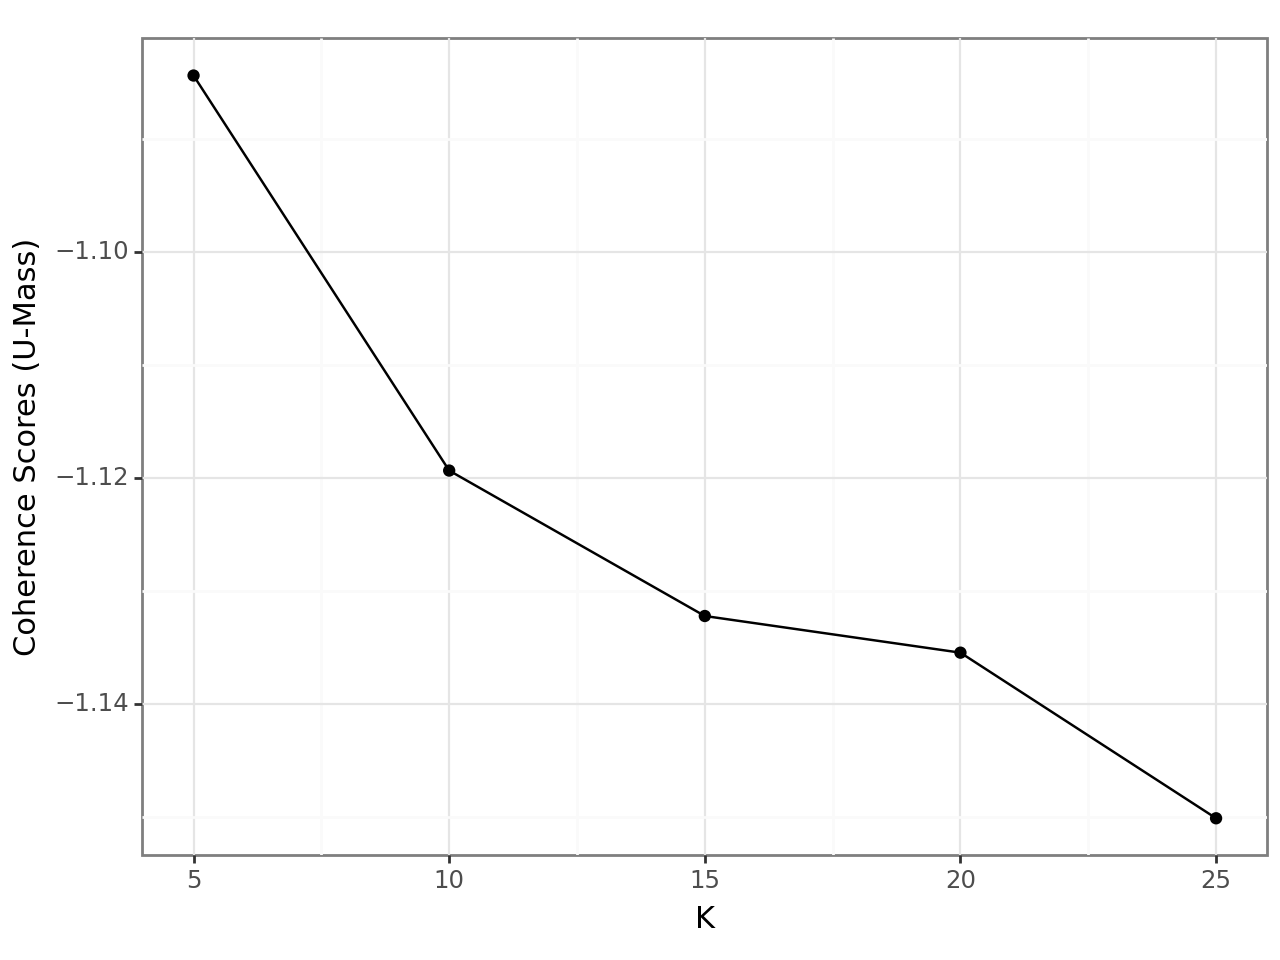

<Figure Size: (640 x 480)>

In [161]:
(ggplot(data=Coherence_df,
        mapping=aes(x="K",y="Coherence_Scores"))+
   geom_point()+
   geom_line()+
   labs(y="Coherence Scores (U-Mass)")+
   theme_bw())

Since we're using `u_mass` and we want our coherence score as close to zero as possible, it looks like `K`=10 topics is the best fit.

***
***

<div class="alert alert-block alert-success">

# Checkpoint 7

Now you try!

Re-run the LDA model with the New York Times data with two new different values of `K` (one larger than the decision you picked before and one smaller) and calculate the coherence scores for the two new values of `K`. (DO NOT use the function above, unless you have lots of time!) 

Based on the coherence scores, which of the three values of `K` is optimal?   

In [170]:
NYmodel_list, NYcoherence_values = compute_coherence_values(dictionary=NYTimes_dictionary_LDA,\
                                                        corpus=NYTimes_corpus,\
                                                        texts=NYTimes_initial_corpus,\
                                                        start=5,\
                                                        limit=30,\
                                                        step=5)

In [171]:
NYCoherence_df = pd.DataFrame({"K":range(5,30,5),"Coherence_Scores":NYcoherence_values})

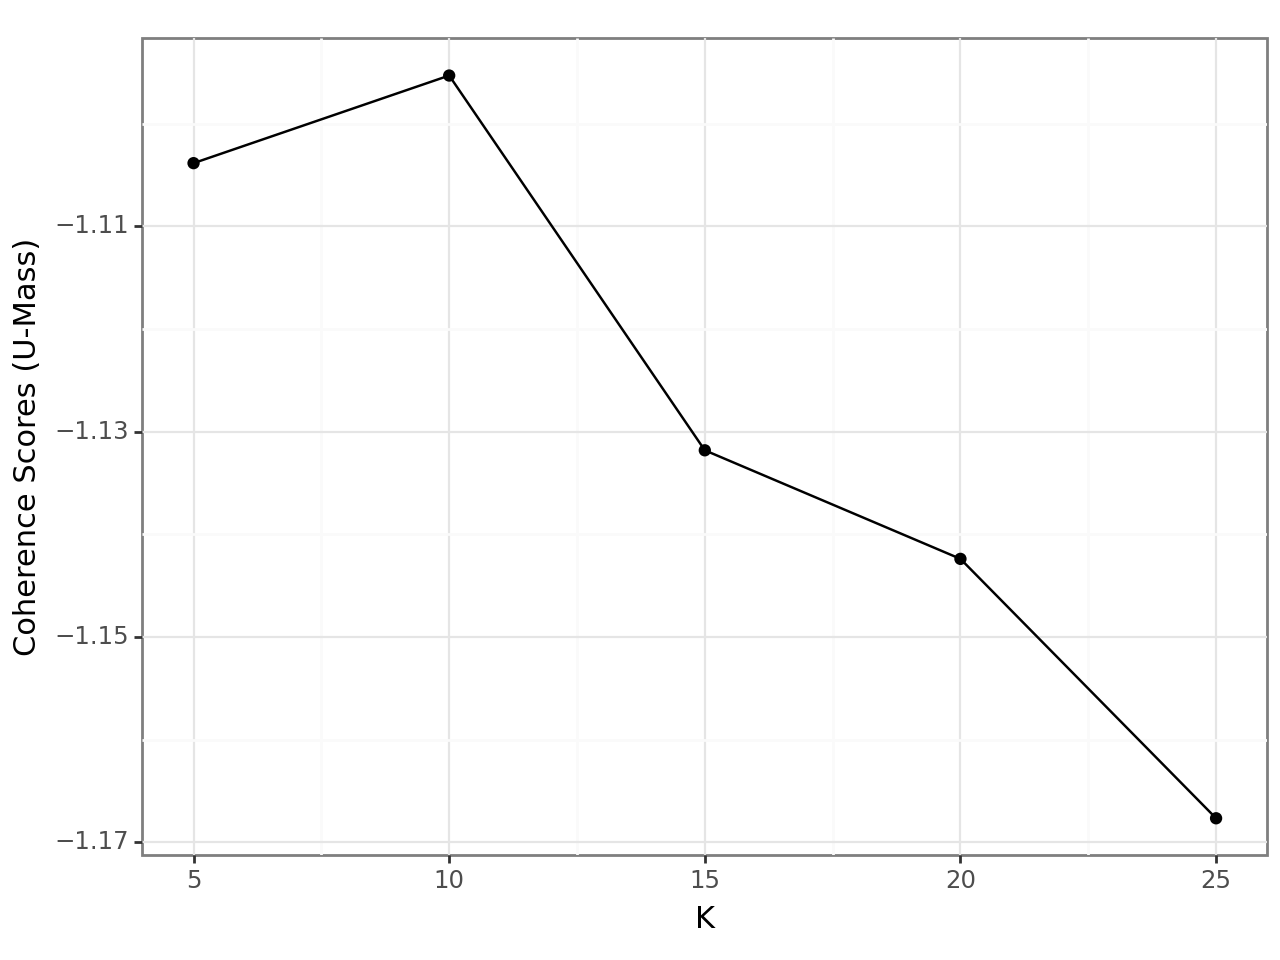

<Figure Size: (640 x 480)>

In [172]:
(ggplot(data=NYCoherence_df,
        mapping=aes(x="K",y="Coherence_Scores"))+
   geom_point()+
   geom_line()+
   labs(y="Coherence Scores (U-Mass)")+
   theme_bw())

***
***

## Author-Topic Models (ATMs) 
Source - https://nbviewer.org/github/rare-technologies/gensim/blob/develop/docs/notebooks/atmodel_tutorial.ipynb

Now that we've learned how to build an LDA model and how to use `gensim`, running more interesting models is streamlined. While the LDA model is good for some exploratory work and is the conceptual foundation for other topic models, we should look to use other topic models that can help us answer more interesting questions. 

The Author-Topic Model (ATM) is an extension of Latent Dirichlet Allocation (LDA), that allows us to learn topic representations of authors in a corpus. 

***The word "Author" in the model's name is misleading: The model can be applied to ANY kinds of labels on documents, such as tags on posts on the web. Note that it is being renamed locally to `LabelTopicModel` to reference the true functionality.*** 

The model can be used as a novel way of data exploration, as features in machine learning pipelines, for author (or tag) prediction, or to simply leverage your topic model with existing metadata.

In [173]:
from gensim.models import AuthorTopicModel as LabelTopicModel

The setup of an ATM is similar to that of an LDA using `gensim`. We have similar inputs, like the `corpus`, the number of topics `num_topics`, etc. 

The big difference is the `author2doc` input, which associated with each document in the corpus, the authors tagged to it. Again "authors" can mean any label associated with the documents (e.g., year, countries, etc.), so "LTM" (for Label-Topic Model) will be how it is referred to from now on.

```python
MY_LTM = LabelTopicModel(corpus=corpus, 
                num_topics=10, 
                id2word=dictionary.id2token,
                author2doc=author2doc, #New Addition!
                chunksize=2000, 
                passes=1, 
                eval_every=0,
                iterations=1, 
                random_state=1)
```

We need to first pass in the value for `author2doc`. This ultimately will be a `Dictionary`, where the `keys`  are the unique country affiliations in our data and the `values` are the document ids where at least one country affiliation is associated to the document. 

We'll need to work with our `Text_df` `DataFrame` to create this `Dictionary`. 

First, let's select the column `countries` into it's own `DataFrame`.

N.B., the indices for `Text_df` will serve as our ***de facto*** document id that we will later use to map on to our other values. 

In [174]:
label2doc = ((Text_df >>
               head(4000) >> #Recall we only looked at the first 4000 rows for the LDA model.
select("countries")).reset_index(drop=True))

In [175]:
label2doc

,countries
0,United States
1,United Kingdom
2,Germany
3,South Africa
4,United States
...,...
3995,Russia
3996,Ireland
3997,Turkey
3998,Austria


Some rows will have more than one country associated with it, representing an international collaboration between authors in different countries. 

We need to take each entry and create a list of these country associations. For most rows, this will be a row with a single entry, but for others, it will be a list containing several country affiliations. 

Luckily with our data, each country affiliation in an international row is separated by a comma. So, let's use `apply()` to each row and split the string that contains country affiliations by the comma.

In [176]:
label2doc = (label2doc.reset_index() >>
 rename(ID = 'index') >>
 mutate(countries = X.countries.apply(lambda x: x.split(", "))))

In [177]:
label2doc

,ID,countries
0,0,[United States]
1,1,[United Kingdom]
2,2,[Germany]
3,3,[South Africa]
4,4,[United States]
...,...,...
3995,3995,[Russia]
3996,3996,[Ireland]
3997,3997,[Turkey]
3998,3998,[Austria]


However, when we pass in these data into our author topic model, we want one row per country affiliation. So, some rows with international collaborators will have mutliple rows, but will have the same ID. 

We can use the `pandas` method called `explore()` which expands lists in each row so that every element in the list is its own row. Hence, the method "`explodes`" the `DataFrame`. 

In [178]:
label2doc = label2doc.explode("countries")

Let's take a look. As you'll see, there aren't any more lists, and multiple entries are now there own rows. 

In [179]:
label2doc

,ID,countries
0,0,United States
1,1,United Kingdom
2,2,Germany
3,3,South Africa
4,4,United States
...,...,...
3995,3995,Russia
3996,3996,Ireland
3997,3997,Turkey
3998,3998,Austria


Finally, we'll need to pass in the affiliations as a `Dictionary` to the author topic model. The `key` will be the country affiliations and for each one, we'll compile the IDs. 

In [180]:
label2doc = label2doc.groupby("countries")["ID"].apply(list).to_dict()

Let's see this in action. Let's see which document IDs have at least one author from "Australia."

In [181]:
label2doc['Australia']

[26,
 33,
 38,
 46,
 48,
 59,
 60,
 63,
 72,
 108,
 126,
 142,
 196,
 207,
 220,
 222,
 230,
 249,
 252,
 314,
 315,
 361,
 366,
 372,
 376,
 380,
 398,
 415,
 424,
 425,
 440,
 451,
 464,
 466,
 489,
 496,
 511,
 537,
 559,
 566,
 573,
 578,
 599,
 620,
 627,
 665,
 678,
 692,
 693,
 703,
 746,
 756,
 776,
 787,
 825,
 834,
 842,
 855,
 870,
 885,
 896,
 905,
 909,
 912,
 917,
 927,
 953,
 985,
 989,
 993,
 999,
 1048,
 1080,
 1099,
 1103,
 1108,
 1131,
 1138,
 1144,
 1147,
 1150,
 1156,
 1178,
 1186,
 1188,
 1240,
 1247,
 1263,
 1268,
 1280,
 1301,
 1304,
 1305,
 1306,
 1320,
 1328,
 1334,
 1337,
 1348,
 1372,
 1458,
 1460,
 1473,
 1480,
 1501,
 1503,
 1522,
 1530,
 1546,
 1551,
 1567,
 1569,
 1580,
 1588,
 1592,
 1594,
 1650,
 1675,
 1683,
 1711,
 1731,
 1750,
 1765,
 1774,
 1776,
 1805,
 1808,
 1838,
 1843,
 1851,
 1874,
 1875,
 1906,
 1954,
 1955,
 1957,
 1963,
 1972,
 1973,
 1982,
 1990,
 2008,
 2014,
 2016,
 2048,
 2050,
 2055,
 2071,
 2072,
 2074,
 2085,
 2093,
 2102,
 2115,
 2

Now we can set up our model parameters in the same was as the LDA model (e.g., number of topics, alpha, etc.)

The **only** difference is the dictionary that we'll pass in for the `author2doc` parameter.

In [190]:
LT_Model = LabelTopicModel(corpus=LDA_corpus, 
                             num_topics=10, 
                             id2word=dictionary_LDA,
                             author2doc=label2doc, 
                             alpha=[0.01]*10,
                             random_state=0)

IndexError: list index out of range

***

## Optimizing the LTM

Before we explore the model, let's try to improve it. 

To do this, we will train several models with different random initializations, by giving different seeds for the random number generator (random_state). We evaluate the topic coherence of the model using the top_topics method, and pick the model with the highest topic coherence.



In [183]:
model_list = {} #Create a list where each entry will be an ATM with a different number of topics. 
for topics_ in range(5,35,5):
    lt_model = LabelTopicModel(corpus=LDA_corpus, 
                             num_topics=topics_, 
                             id2word=dictionary_LDA,
                             author2doc=label2doc, 
                             alpha=[0.01]*topics_,
                              random_state=0)
    
    ltm_coherence_k = CoherenceModel(model=lt_model, texts=initial_corpus, dictionary=dictionary_LDA, coherence='u_mass')
    model_list[topics_] = ltm_coherence_k.get_coherence()

IndexError: list index out of range

Choose the model with the highest topic coherence.

Let's set up the data and plot it!


In [184]:
LTM_Coherence_df = pd.DataFrame.from_dict(model_list,columns=["Coherence"],orient='index').rename_axis("K").reset_index()

In [185]:
(ggplot(data=LTM_Coherence_df,
        mapping=aes(x="K",y="Coherence"))+
   geom_point()+
   geom_line()+
   labs(y="Coherence Scores (U-Mass)")+
   theme_bw())

TypeError: object of type 'NoneType' has no len()

It looks like `K`=5 works best!

***
## Saving the Model. 

Training these models take a long time! 

So, we save the model and its parameter files to avoid having to train it again. Let's use `pickle` here. 

Let's import `bz2` to compress the file to save hard drive space and `cPickle` to save these objects to file.

In [186]:
import bz2
import _pickle as cPickle

In [187]:
output_filename = "Output/My_First_LT_Model.pbz2"

with bz2.BZ2File(output_filename, 'w') as f: # This is saving the file. 
    cPickle.dump(LT_Model, f) # This is the model we just ran. 
    cPickle.dump(dictionary_LDA, f) # This is the dictionary. 
    cPickle.dump(label2doc, f) # This is the author2doc dictionary.
f.close() # Close the buffer. 

NameError: name 'LT_Model' is not defined

Now, after saving our model, let's re-load it back into memory. 

In [188]:
f = bz2.BZ2File(output_filename, 'rb')
LT_Model = cPickle.load(f)
dictionary_LDA = cPickle.load(f)
label2doc = cPickle.load(f)

EOFError: Ran out of input

***
***

<div class="alert alert-block alert-success">

# Checkpoint 8

Now you try!

We initially ran our author-topic model with `K`=10 topics. Rerun it with the optimal number of `K` topics from our coherence figure. Be sure to rename your author-topic model object to something different, like `Optimal_LT_Model`.
    
Pickle just this model to your `Output/` folder and call it `My_Optimal_LT_Model.pbz2`.

***
***

## Exploring Label-Topic Representation
Now that we have trained a model, we can start exploring the labels and the topics.

First, let's simply print the most important words in the topics. 

Let's look at the ten topics we created. 

As we can see, each topic is associated with a set of words, and each word has a probability of being expressed under that topic.

For your own work, you'd want to run this multiple times, each time choosing different parameters and trimming your corpus.

In [205]:
LT_Model.show_topic(0)

NameError: name 'LT_Model' is not defined

In [206]:
LT_Model.show_topic(4)

NameError: name 'LT_Model' is not defined

Ideally, we would want to give a name to each topic based on what each one seems to be about intuitively. This is where topic modelling is more of an "art" than a "science" and requires subject matter expertise. 

For our purposes here and for simplicity, we're just going to call them by numbers.

In [207]:
topic_labels = [str(x) for x in range(0,10)]

Rather than just calling `model.show_topics(num_topics=10)`, we format the output a bit so it is easier to get an overview.



In [208]:
for topic in LT_Model.show_topics(num_topics=10):
    print('Topic: ' + topic_labels[topic[0]])
    words = ''
    
    for word, prob in LT_Model.show_topic(topic[0]):
        words += word + ' '
    print('Words: ' + words)
    print()

NameError: name 'LT_Model' is not defined

These topics are by no means perfect. They have problems such as chained topics, intruded words, random topics, and unbalanced topics (see Mimno and co-authors 2011). They will do for the purposes of this tutorial, however.

***
***

<div class="alert alert-block alert-success">

# Checkpoint 9

Now you try!

Load in the optimal author-topic model you pickeled and print out the top terms for each of the `K`=5 topics. 
    
Instead of numbering them 0 through 4, name these topics. There are not wrong answers, but give it a good try! You'll eventually need to do this with your own data. 

***
***

## Label Similarity 

In this section, we are going to set up a system that takes a label and yields the labels that are most similar. This functionality can be used as a component in an information retrieval (i.e. a search engine of some kind), or in an author prediction system, i.e. a system that takes an unlabelled document and predicts the author(s) that wrote it.

We simply need to search for the closest vector in the label-topic space. In this sense, the approach is similar to the t-SNE plot above.

Below we illustrate a similarity query using a built-in similarity framework in Gensim.

First, we can use the `model[name]` syntax to retrieve the topic distribution for an author. Each topic has a probability of being expressed given the particular author, but only the ones above a certain threshold are shown.

In [209]:
lt_model['United States']

NameError: name 'lt_model' is not defined

This is helpful, because we can see which topics are popular with certain countries. 

Alterntively, what if we wanted to see how similar each country is to every other country?

Let's use `gensim.similarities` to create a matrix of topic similarity for each country.

In [210]:
from gensim.similarities import MatrixSimilarity

Generate a similarity object for the transformed corpus.

In [211]:
index = MatrixSimilarity(LT_Model[list(LT_Model.id2author.values())])

NameError: name 'LT_Model' is not defined

Extract a list of all the countries present in the data.

In [212]:
labellist = [label for label in label2doc.keys()]

In [213]:
labellist

['Afghanistan',
 'Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mali',
 'Malta',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Macedonia',
 'Norway',
 'Oman',
 'Pakista

Let's get similarities to a sample country. Let's pick the United States.

In [214]:
label = 'United States'
sims = pd.DataFrame(index[LT_Model[label]],columns=[label],index=labellist)

NameError: name 'index' is not defined

Here, let's only consider other countries whose similarity is non-zero but less than 1. 

For this example, we'll get odd results. 

We'd likely need more data and to parse the data more extensively to really get some meaningful results. This would include more meaningfully removing certain non-informative terms, different parameters, excluding countris with small ***n*** number of documents, etc. 

The point here is that once you do this over several iterations, you can start to see meaningful patterns in the data. 

In [215]:
(sims>>
 mask(X['United States']>0,X['United States']!=1)>>
arrange(X['United States']))

NameError: name 'sims' is not defined

Finally, we can create the full similarity matrix and look at how every country compares to every other country.

In [216]:
similarity_matrix_df = pd.concat([pd.DataFrame(index[LT_Model[label_]],columns=[label_],index=labellist) for label_ in labellist], axis=1)

NameError: name 'index' is not defined

In [217]:
similarity_matrix_df.head()

NameError: name 'similarity_matrix_df' is not defined

***
***

<div class="alert alert-block alert-success">

# Checkpoint 10

Now you try!

Create the similarity matrix using your `K`=5 label-topic model. Also explore the most similar and most dis-similar countries compared to the United States. How do your results differ?

***
***

<div class="alert alert-block alert-warning">

***Be sure to turn off your kernel before closing!***
    
<p style="text-align:center;">
        <img src=Images/Best_Practice.png width=500 class="center">
</p>

</div>